In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config Completer.use_jedi = False

In [95]:
train=pd.read_csv('train_titanic.csv')

PassengerId

Survived -- 0 = No, 1 = Yes

Pclass -- Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

Name -- Passenger name

Sex -- male / female

Age -- age in years

SibSp -- no. of siblings / spouses aboard the Titanic

Parch -- no. of parents / children aboard the Titanic

Ticket -- Ticket number

Fare -- Passenger fare

Cabin -- Cabin number

Embarked -- Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Calculate percentage of missing values

In [11]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [12]:
#to count total number of rows
train.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [4]:
#percentange of missing value
#round the value
percentage_missing_data=round(((train.isnull().sum())/(train.isnull().count()))*100,1)
percentage_missing_data

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

#### Lets create Heatmap to visualize missing data

<AxesSubplot:>

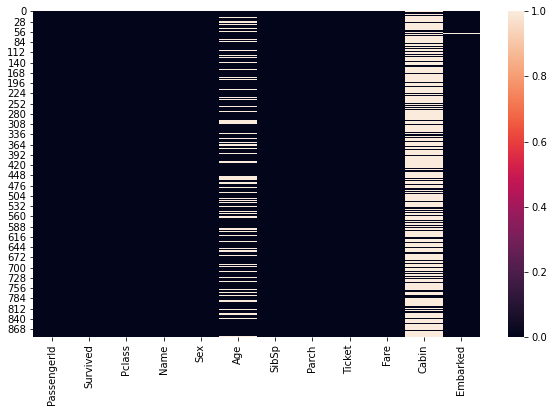

In [96]:
plt.subplots(figsize=(10,6))
sns.heatmap(train.isnull())

<AxesSubplot:>

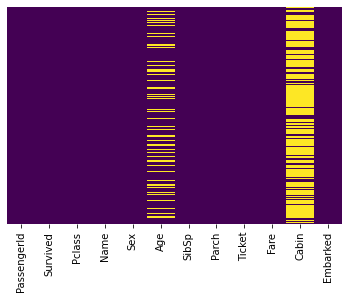

In [8]:
#for better visualization
sns.heatmap(data=train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

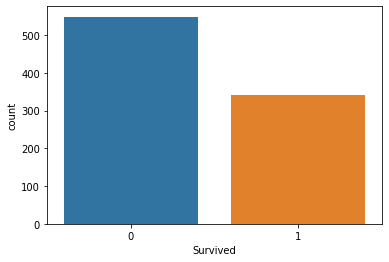

In [9]:
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

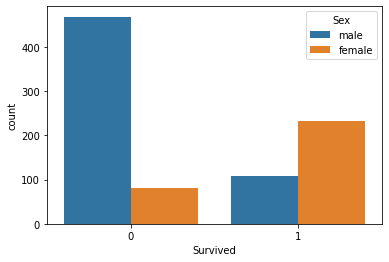

In [12]:
#by adding Sex we can get to see which sex has more survival rate
sns.countplot(x='Survived',hue='Sex',data=train)

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train)

In [13]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Survived', ylabel='count'>

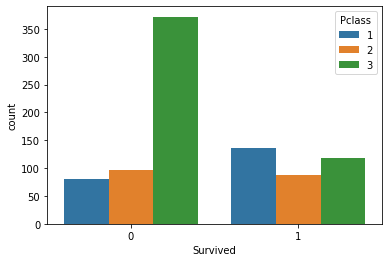

In [15]:
#which class survived the most
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

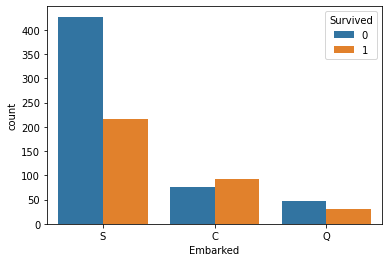

In [17]:
#which port has more survival count
sns.countplot(x='Embarked',hue='Survived',data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

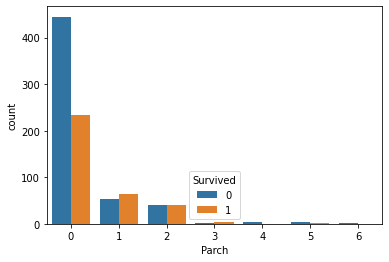

In [18]:
#which age group has more survival count
sns.countplot(x='Parch',hue='Survived',data=train)

In [16]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Part 2

In [19]:
percentage_missing_data

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

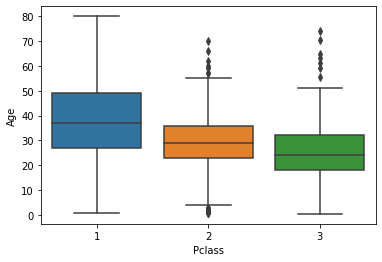

In [20]:
#lets use box plot to explore any relationship between class and passenger age 
sns.boxplot(x='Pclass',y='Age', data=train)

##### Average age of passenger in each class

In [23]:
train[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


#### Custom function to fill in missing data

In [26]:
#this function returns the mean value computed on above cell
def impute_age(age_pclass):
    age=age_pclass[0]
    pclass=age_pclass[1]
    if(pd.isnull(age)):
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        else:
            return 25
    else:
        return age

In [27]:
train[['Age','Pclass']].apply(impute_age,axis=1)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

In [28]:
#Lets fill this in the age column
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

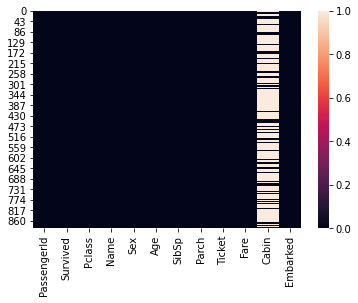

In [30]:
#Now create a heatmap to check the new value
sns.heatmap(data=train.isnull())

In [31]:
#as cabin column has more missing data lets drop as of now
train.drop('Cabin',axis=1,inplace=True)

Text(0.5, 1.0, 'Missing values heatmap')

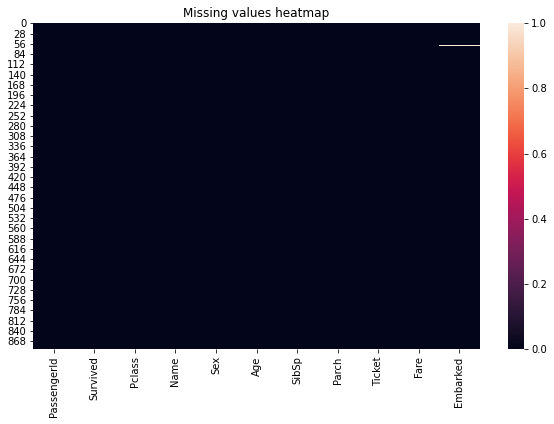

In [58]:
plt.subplots(figsize=(10,6))
sns.heatmap(train.isnull()).set_title("Missing values heatmap")

In [59]:
#we have 2 null values in  Embarked column, so lets drop it
train.dropna(inplace=True)

Text(0.5, 1.0, 'Missing values heatmap')

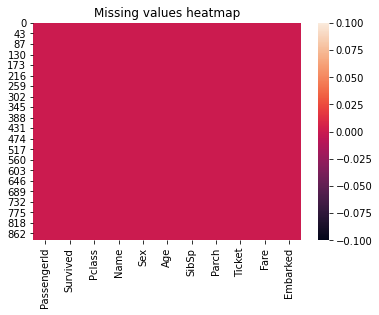

In [60]:
#Now lets see the HeatMap
sns.heatmap(train.isnull()).set_title("Missing values heatmap")

#### Lets work with categorical variables

In [61]:
#We have to remove variable with text value.
# that mean we have to remove them and add dummies
#pandas have some intersting thing to work with dummies
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [62]:
#Remove multicollinearity(*) by adding drop_first
sex=pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [63]:
#lets do the same for Embarked
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [65]:
#Remove multicollinearity(*) by adding drop_first
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [67]:
train=pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [70]:
#Lets drop some columns
#Sex, Embarked, Name, Ticket, PassengerId
train.drop(['Sex', 'Embarked', 'Name', 'Ticket','PassengerId'],axis=1,inplace=True)

In [73]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Part 3

#### Model Creation

In [74]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [75]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [76]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y, test_size=0.33,
                                               random_state=42)

In [87]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=2000)

In [88]:
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [89]:
predict=logreg.predict(X_test)

#### Evaluation process

In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294



In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)

array([[156,  28],
       [ 26,  84]], dtype=int64)

### Understanding classification_report

There are four ways to check if the predictions are right or wrong:
TN / True Negative: the case was negative and predicted negative
TP / True Positive: the case was positive and predicted positive
FN / False Negative: the case was positive but predicted negative
FP / False Positive: the case was negative but predicted positive
    
Precision — What percent of your predictions were correct?
Precision = TP/(TP + FP)
Recall — What percent of the positive cases did you catch?
Recall = TP/(TP+FN)
F1 score — What percent of positive predictions were correct?
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397


### Understanding confusion_matrix

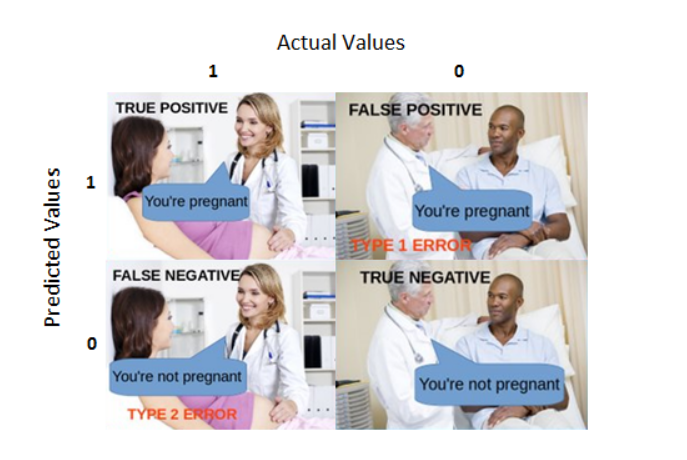

True Positive

    Interpretation: You predicted positive and it’s true.
    
True Negative

    Interpretation: You predicted negative and it’s true.
    
False Positive (Type 1 Error)

    Interpretation: You predicted positive and it’s false.
    
False Negative (Type 2 Error)

    Interpretation: You predicted negative and it’s false.

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62